In [ ]:
!pip install missingno

In [ ]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16598, 11)

In [ ]:
# Is there any dublicated row ?
df.duplicated().any()


False

In [ ]:
# Is there any null value ?
df.isnull().values.any()

True

In [ ]:
# Find number of null columns
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

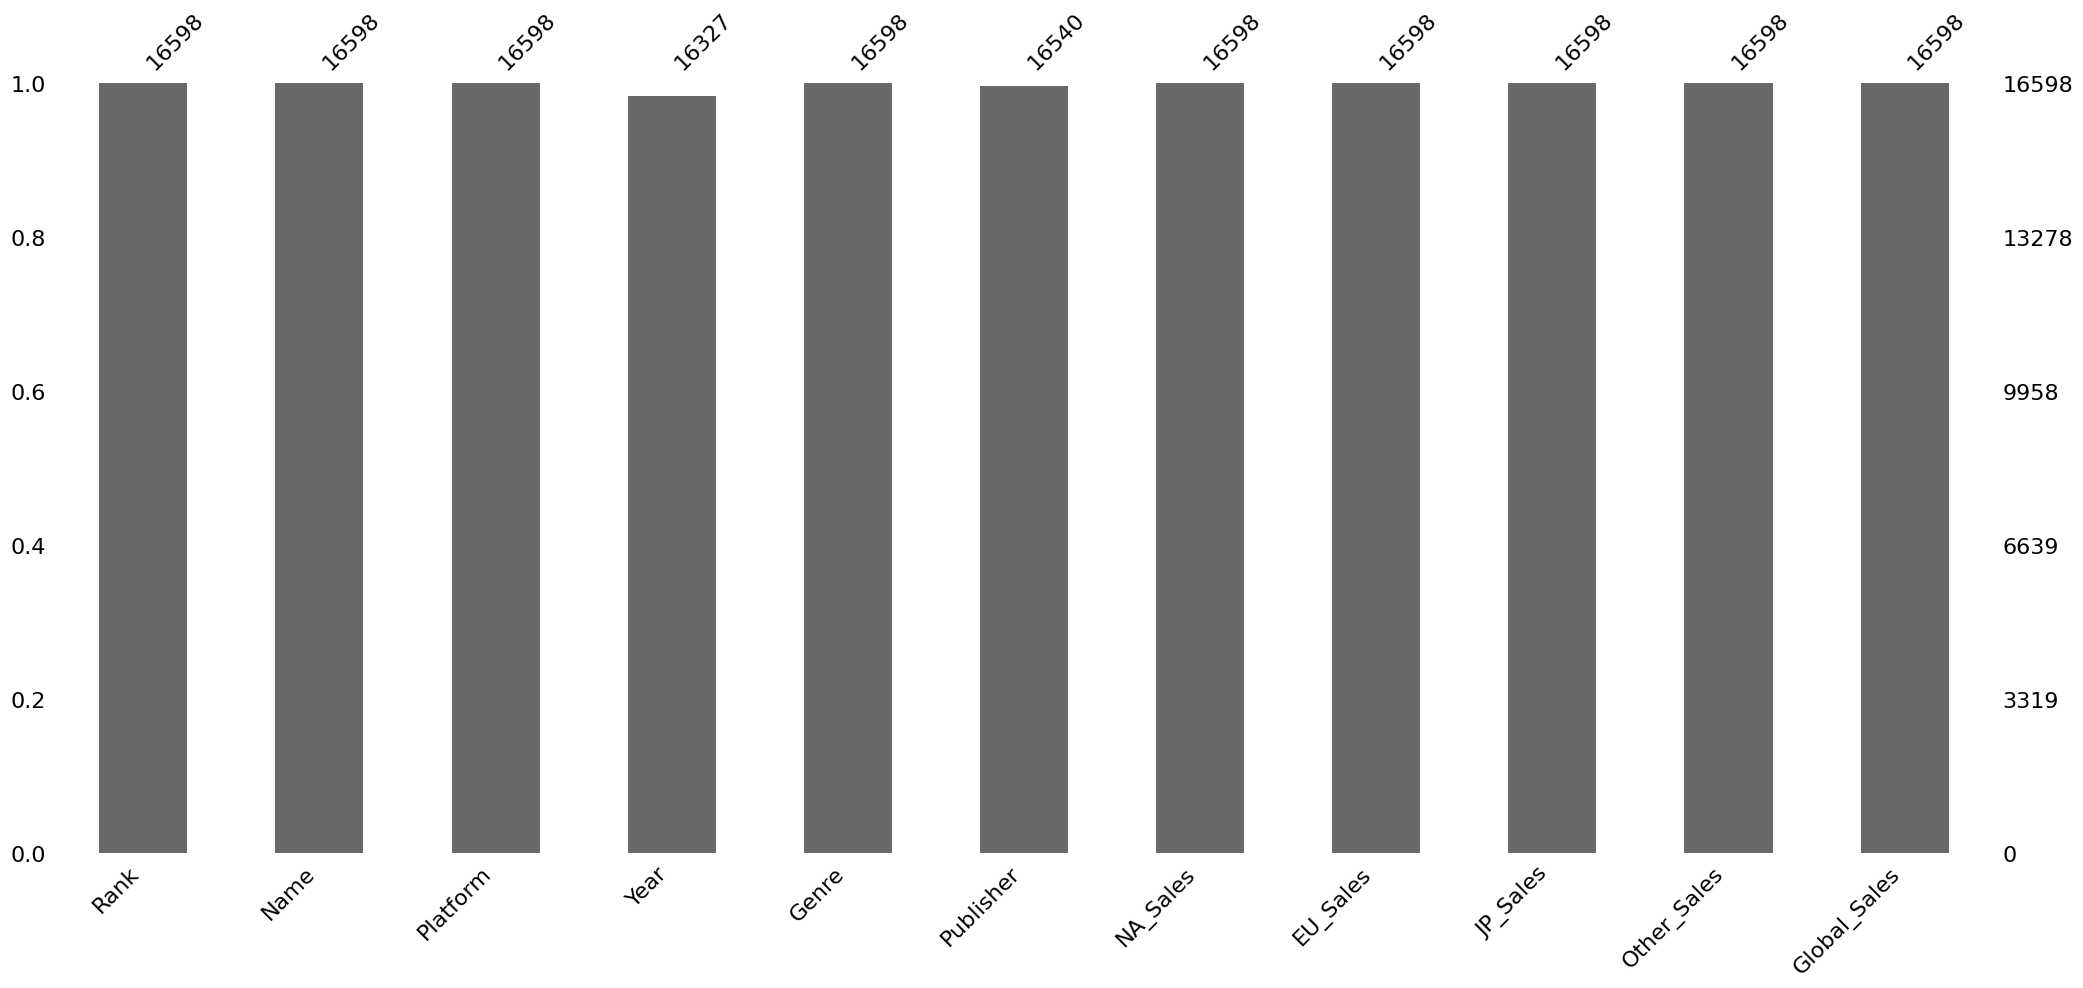

In [ ]:
import missingno as msno
msno.bar(df);
# Plot of variables in the data set
# It expresses the lack of variables proportionally.
# Based on 16598 observations, year and puplisher are also missing.

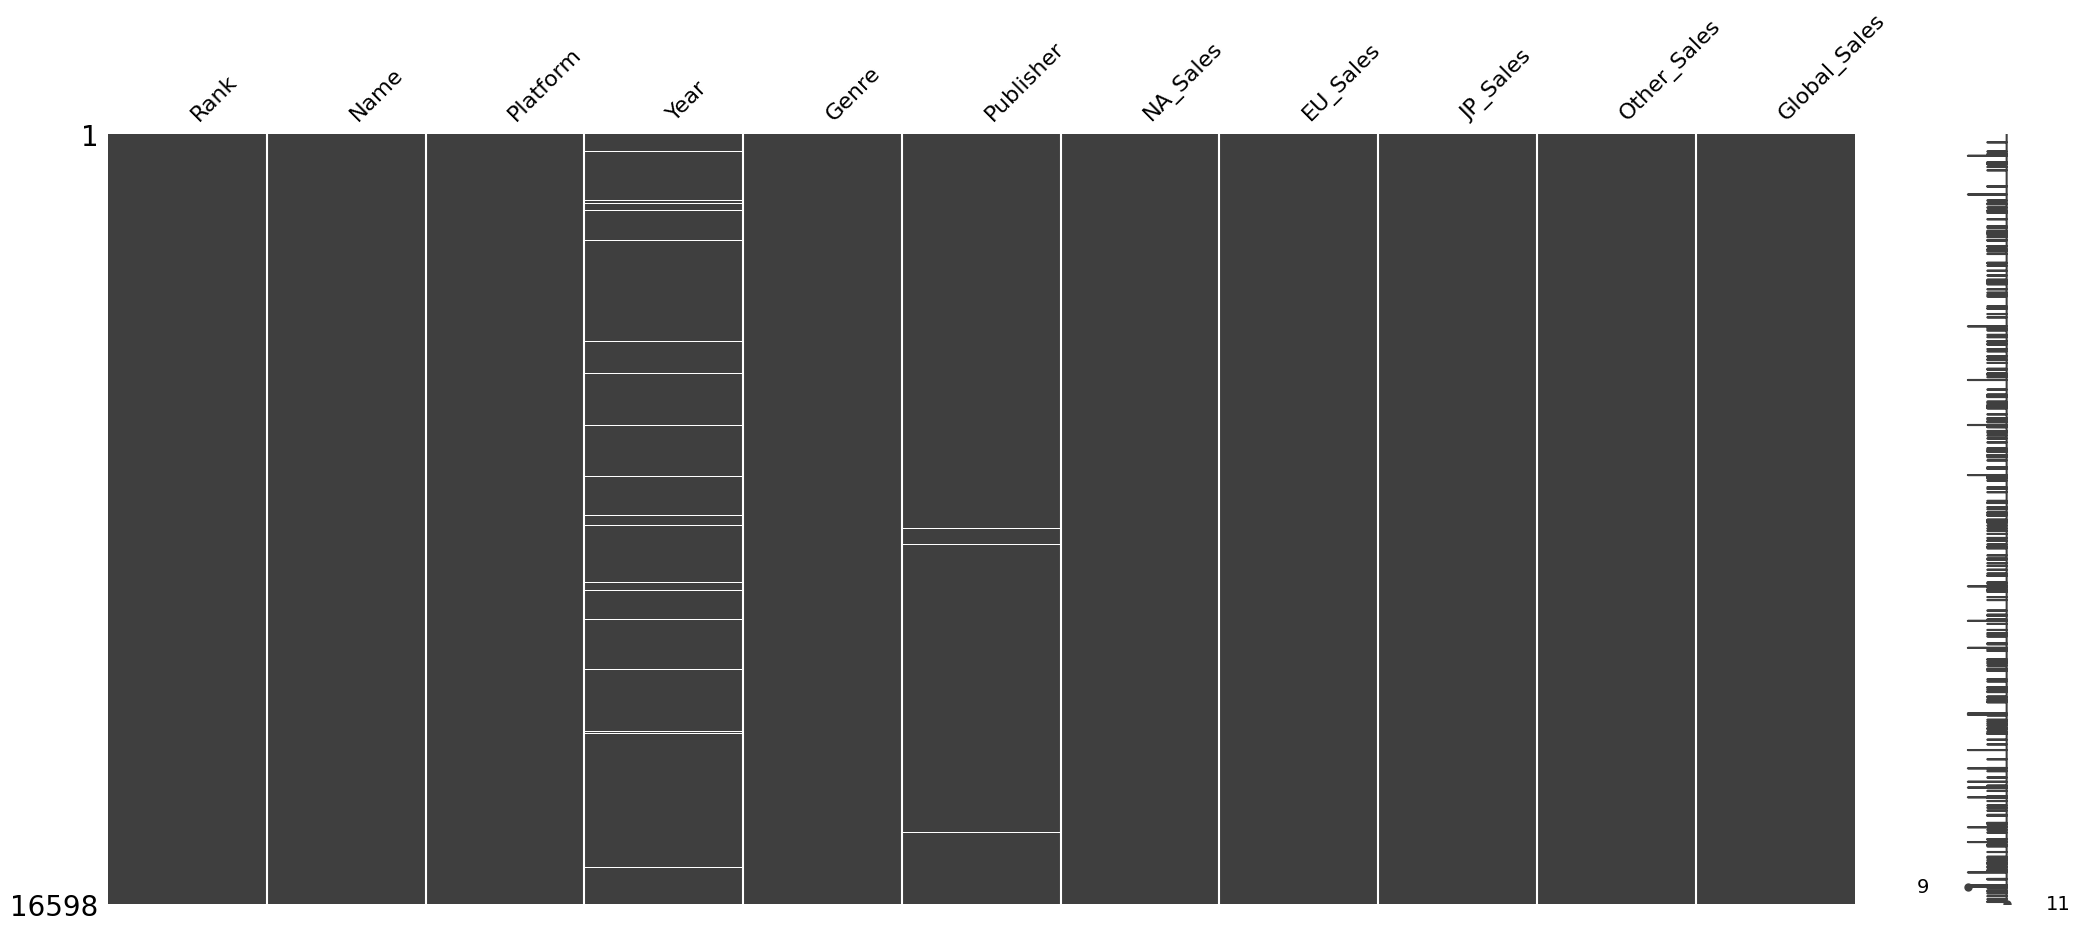

In [ ]:
msno.matrix(df);
#There is no dependency between the variables Year and Publisher.

In [ ]:
# I filled the empty values in the Publisher column of the categorical variable with the modal value.
df["Publisher"].fillna(df["Publisher"].mode()[0], inplace=True)
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.dropna(subset=['Year'], inplace=True)

In [ ]:
# Check for missing values (no more missing values)
df.isnull().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df["Year"].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# Show years as 2000 instead of 2000.0
df['Year'] = df['Year'].apply(lambda x: str(x)[:-2] if not pd.isnull(x) else x).astype(int)

In [ ]:
# In the 'Year' column I deleted the rows for the year 2020 because there was only one data.
df.drop(df[df["Year"] == 2020].index, inplace=True)

In [ ]:
df.isnull().values.any()

False

In [ ]:
# I deleted the rank column from the data set since rank and index values indicate the same thing.
df.drop('Rank', axis=1,inplace=True)

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
mean,2006.405611,0.265415,0.147563,0.078666,0.048327,0.540247
std,5.828189,0.821616,0.508780,0.311566,0.189891,1.565779
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<ipython-input-165-023e5af2786b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")


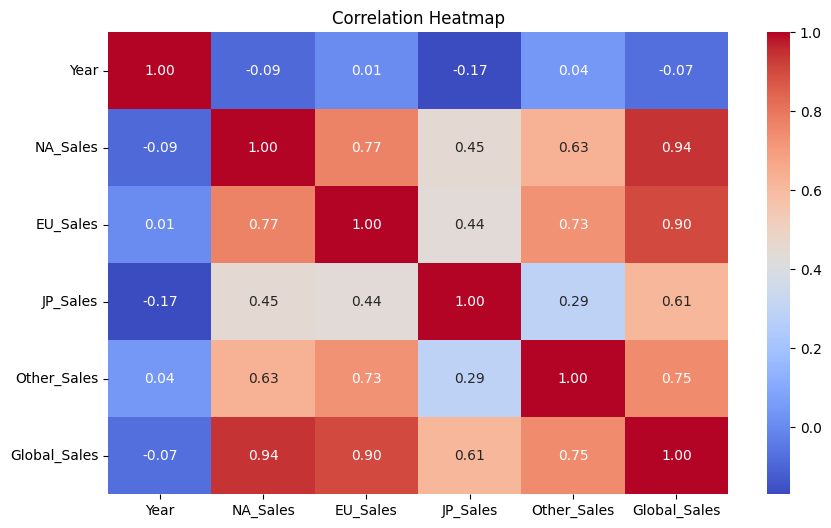

In [ ]:
# The heatmap provides a visual representation of the correlation values, where higher values are typically represented by warmer colors (e.g. red) and lower values by cooler colors (e.g. blue).

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

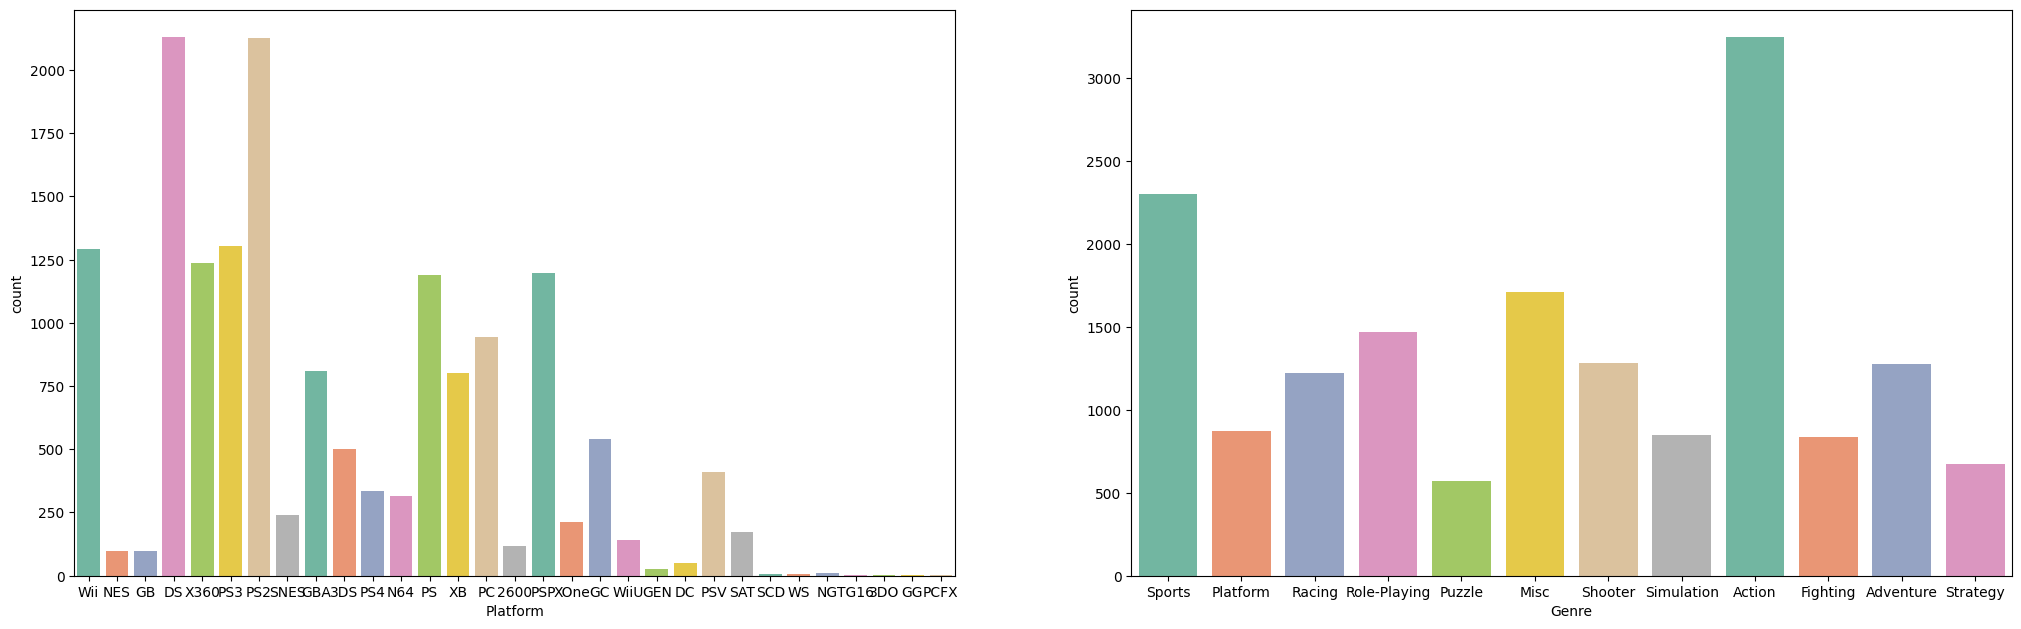

In [ ]:
#Categorical Variables
plt.figure(figsize = (25,25))

plt.subplot(3,2,1)
sns.countplot(x = 'Platform', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Genre', palette='Set2', data = df)

plt.show()

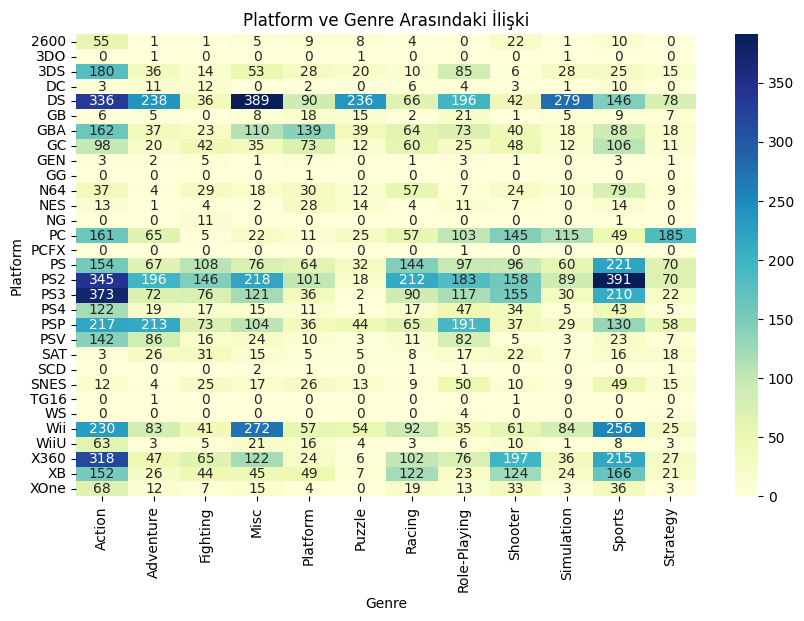

In [ ]:
# Relationship between categorical variables "Platform" (platform on which the game is published), "Genre" (type of game)
cross_tab = pd.crosstab(df['Platform'], df['Genre'])#Çaprazlama
#Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Platform ve Genre Arasındaki İlişki")
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.show()

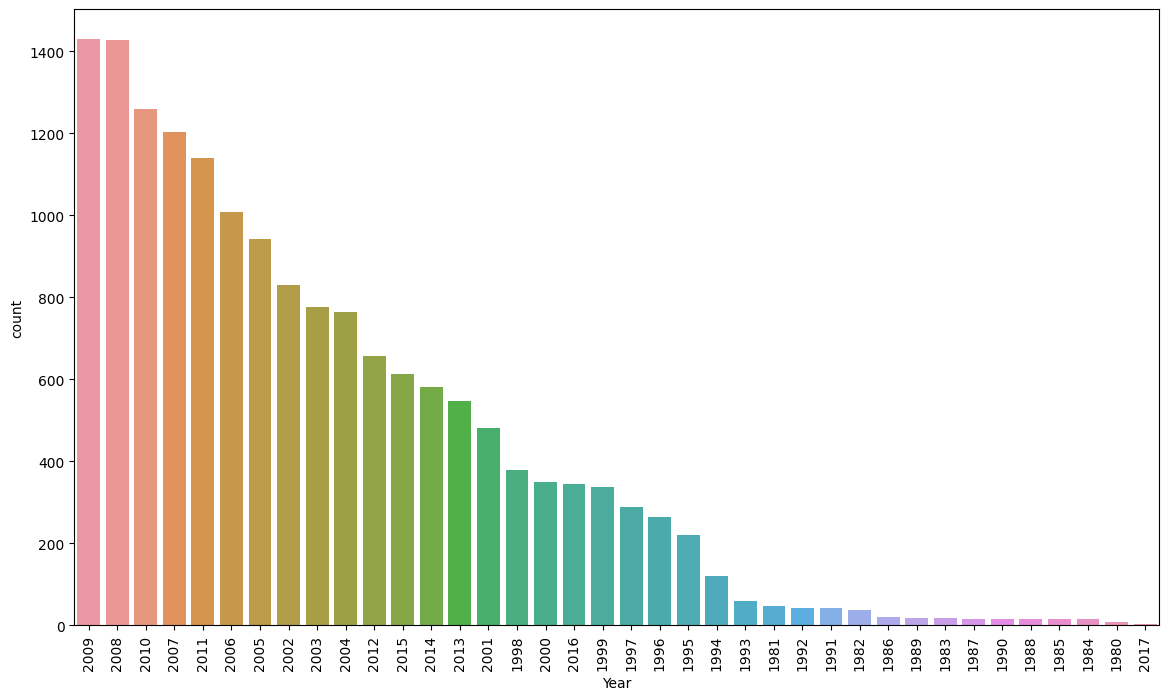

In [ ]:
# Which year saw the most game releases
plt.figure(figsize=(14,8))
order = df.groupby('Year')['Name'].count().sort_values(ascending=False).index
sns.countplot(x='Year', data=df, order=order)
plt.xticks(rotation=90)
plt.show()

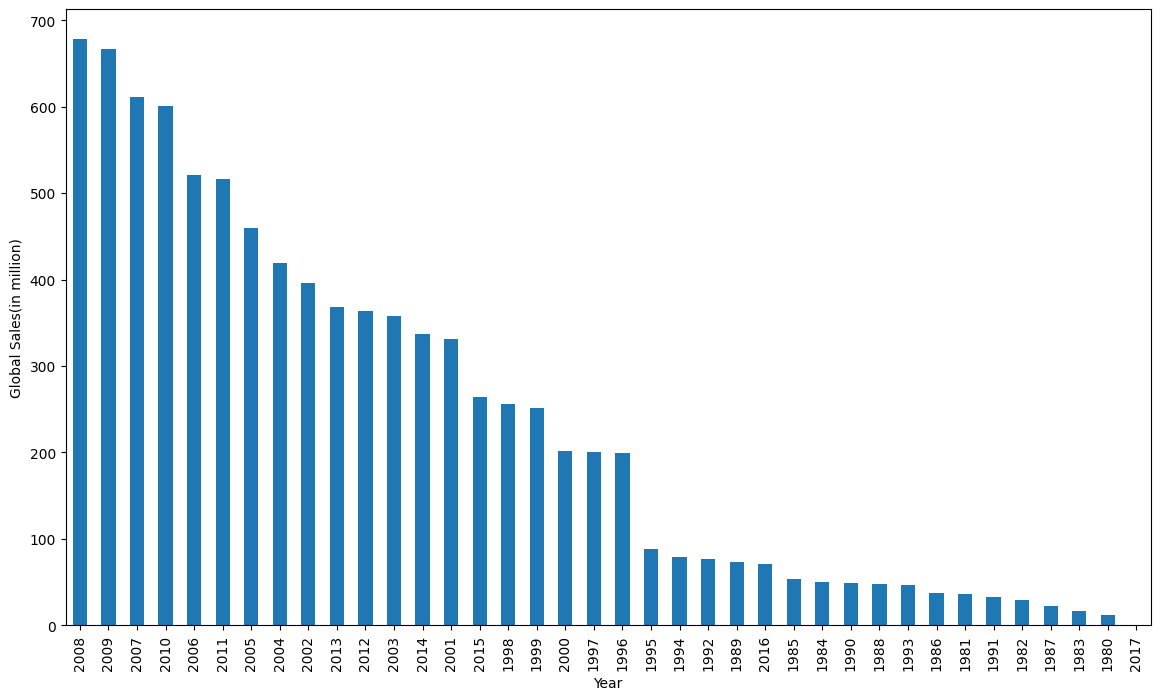

In [ ]:
x=df.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)
x.plot(kind="bar",figsize=(14,8))
plt.ylabel("Global Sales(in million)")
plt.xlabel("Year")
plt.show()

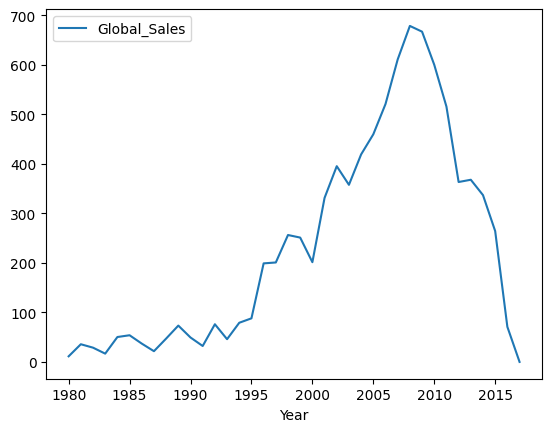

In [ ]:
# Distribution of global sales by year
df.groupby("Year")["Global_Sales"].sum()
df.pivot_table("Global_Sales",index="Year",aggfunc="sum").plot();

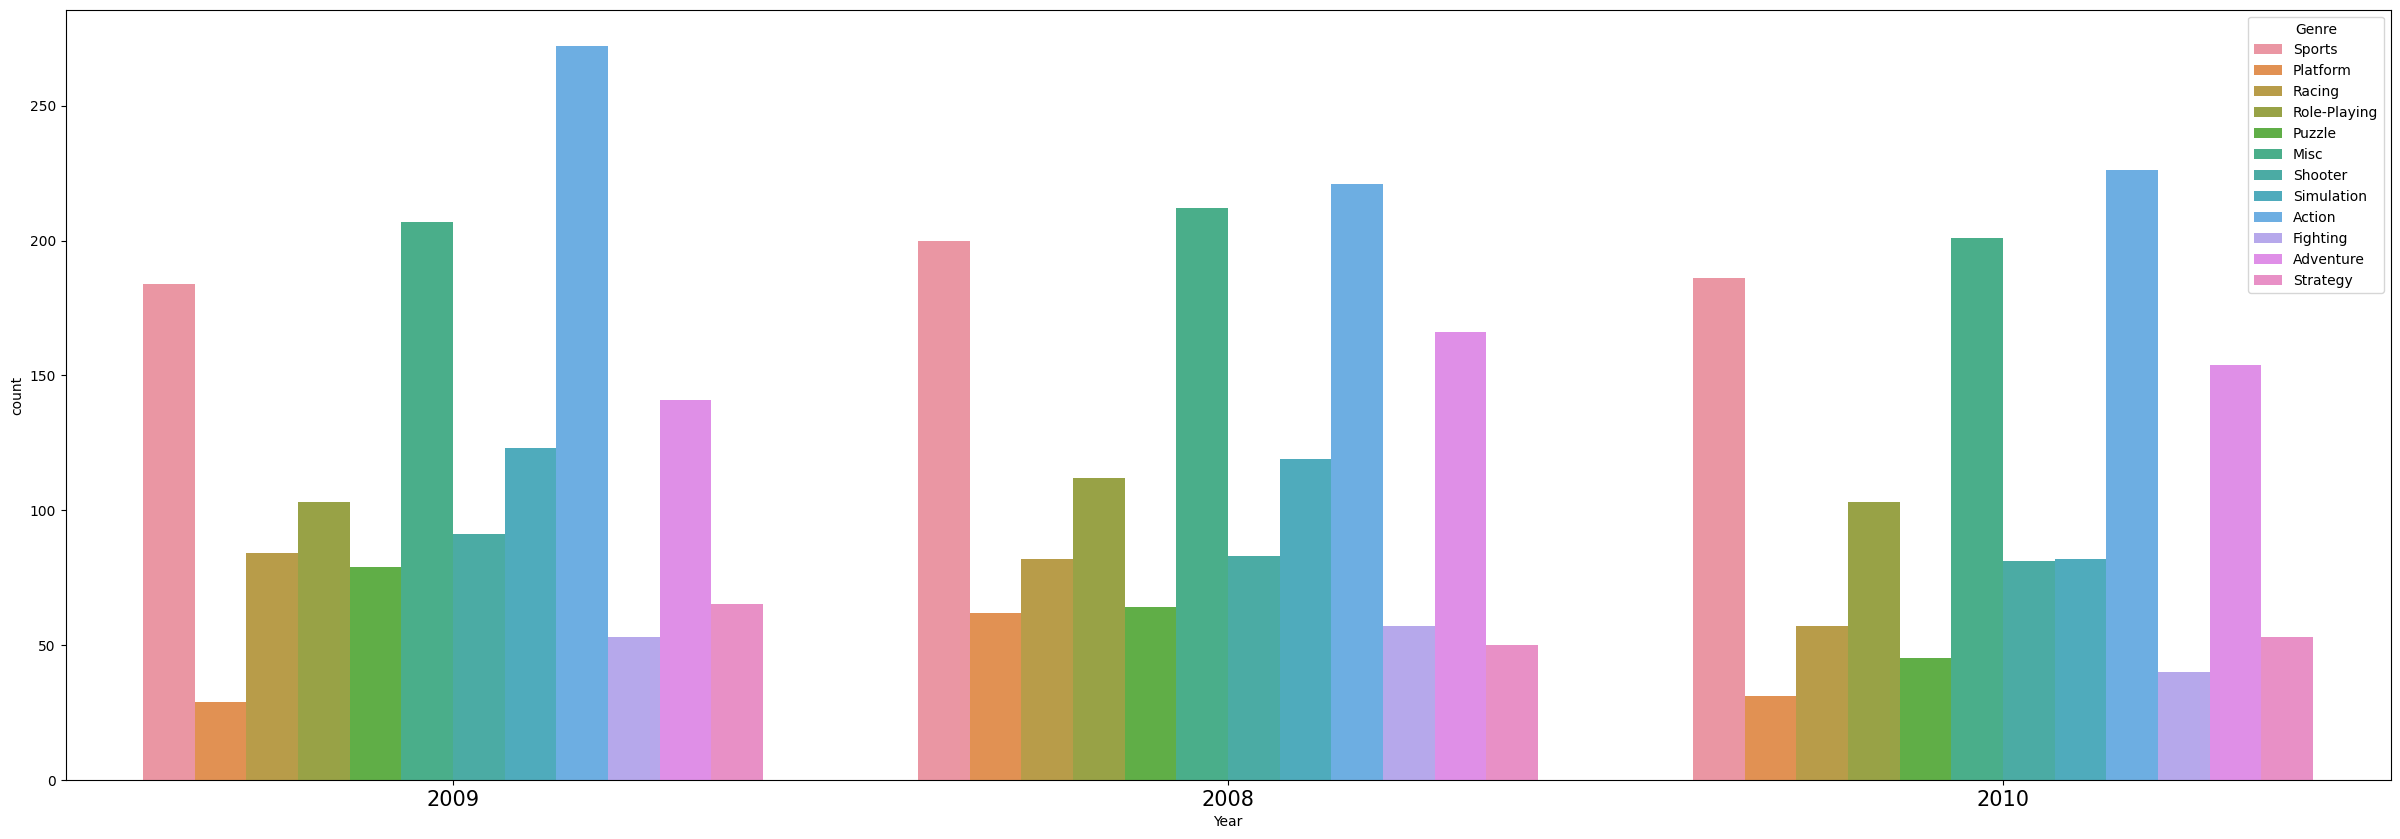

In [ ]:
# The 3 years with the most game releases and by what types of releases
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:3].index)
plt.xticks(size=15)
plt.show()

In [ ]:
# Summary of sales by region
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].describe().T

,count,mean,std,min,25%,50%,75%,max
NA_Sales,16326.0,0.265415,0.821616,0.0,0.0,0.08,0.24,41.49
EU_Sales,16326.0,0.147563,0.508780,0.0,0.0,0.02,0.11,29.02
JP_Sales,16326.0,0.078666,0.311566,0.0,0.0,0.00,0.04,10.22
Other_Sales,16326.0,0.048327,0.189891,0.0,0.0,0.01,0.04,10.57


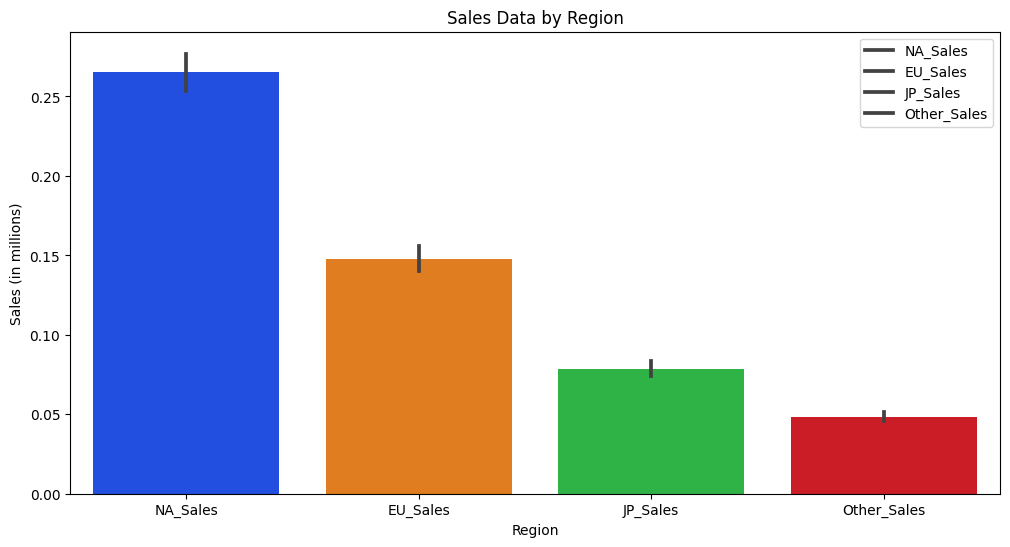

In [ ]:
# Sales to regions
sales = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
sales_data = df[sales].head(df["Global_Sales"].count())
plt.figure(figsize=(12,6))
sns.barplot(data=sales_data, palette="bright")
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.title('Sales Data by Region')
plt.legend(labels=sales)
plt.show()

<ipython-input-174-859de6eef58c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_sales_melted, x="Year", y="Sales", hue="Region", ci=None)


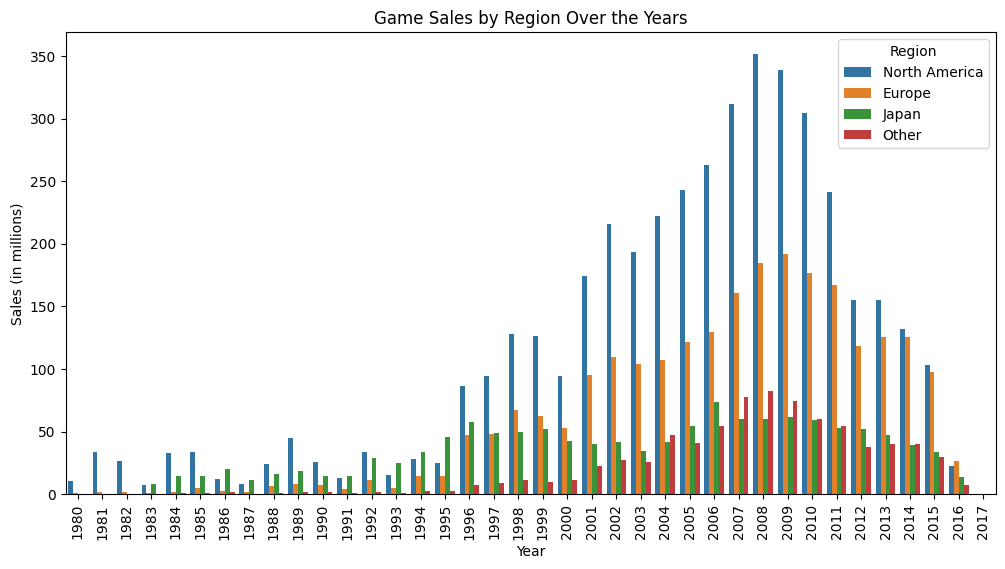

In [ ]:
# Total sales in regions by year
region_sales = df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
region_sales_melted = pd.melt(region_sales, id_vars=["Year"], var_name="Region", value_name="Sales")
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales_melted, x="Year", y="Sales", hue="Region", ci=None)
plt.xlabel("Year")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=90)
plt.title("Game Sales by Region Over the Years")
plt.legend(title="Region", labels=["North America", "Europe", "Japan", "Other"])
plt.show()

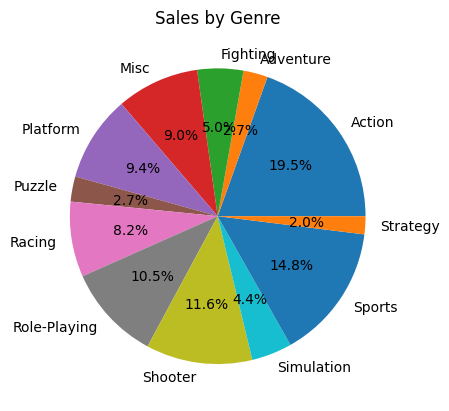

In [ ]:
genre_sales_top= df.groupby("Genre")["Global_Sales"].sum()
plt.pie(genre_sales_top , labels=genre_sales_top.index, autopct="%1.1f%%")
plt.title("Sales by Genre")
plt.show()

In [ ]:
df.groupby(["Genre"])["NA_Sales","EU_Sales","JP_Sales","Other_Sales"].aggregate("sum")

<ipython-input-176-971ebe5414d1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Genre"])["NA_Sales","EU_Sales","JP_Sales","Other_Sales"].aggregate("sum")


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.80,516.48,158.66,184.92
Adventure,102.06,63.79,52.01,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,402.48,213.82,106.67,74.02
Platform,445.99,200.67,130.65,51.51
Puzzle,122.01,50.53,56.68,12.47
Racing,356.93,236.32,56.61,76.68
Role-Playing,326.50,187.58,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


<ipython-input-177-3e356439bf62>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_with_genre=df.groupby(["Genre"])["NA_Sales","EU_Sales","JP_Sales","Other_Sales"].aggregate("sum")


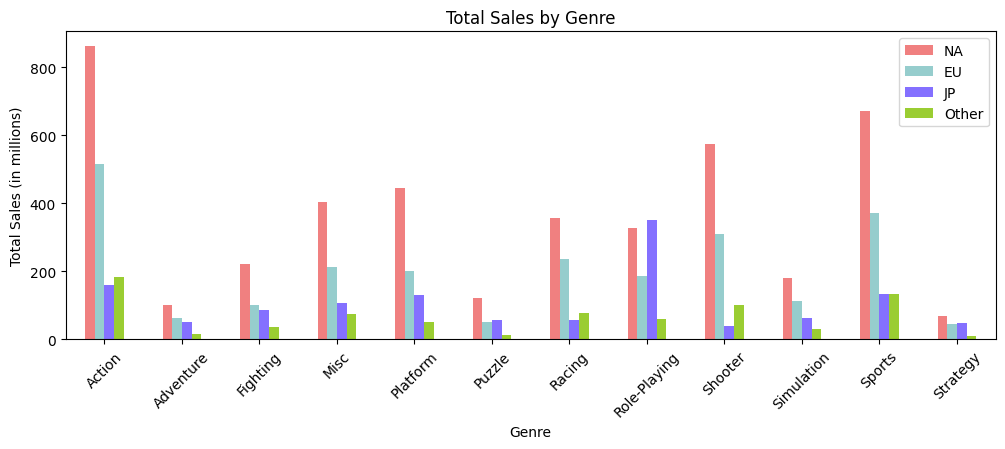

In [ ]:
sales_with_genre=df.groupby(["Genre"])["NA_Sales","EU_Sales","JP_Sales","Other_Sales"].aggregate("sum")
colors=["#F08080","#96CDCD","#8470FF","#9ACD32"]
sales_with_genre.plot(kind="bar", figsize=(12,4), color=colors)
plt.title("Total Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.legend(["NA", "EU", "JP", "Other"])
plt.show()

In [ ]:
# I tested with ANOVA whether game genres statistically affect global sales.
# Hypotheses:
# H0: Game genres have no effect on global sales
# H1:Game genres have an impact on global sales
from scipy.stats import f_oneway
genre_groups = []
for genre, group in df.groupby('Genre')['Global_Sales']:
    genre_groups.append(group)

# ANOVA test
anova_result = f_oneway(*genre_groups)

# Test results
print("ANOVA Test Sonucu:")
print("F istatistiği:", anova_result.statistic)
print("p değeri:", anova_result.pvalue)
# The P-value is significantly smaller than 0.05 and we reject hypothesis H0. As a result, game genres have a significant impact on global sales.

ANOVA Test Sonucu:
F istatistiği: 18.239147446039347
p değeri: 9.618711749729705e-37


In [ ]:
# Simplification of years / breakdown of total sales by genre and years
df["Year"]=10*(df["Year"]//10)
genre_year=df.groupby(["Genre","Year"])["Global_Sales"].aggregate("sum").unstack()
genre_year

Year,1980,1990,2000,2010
Genre,,,,
Action,51.18,139.29,858.91,673.50
Adventure,4.78,44.81,124.16,61.05
Fighting,7.24,123.45,231.28,82.08
Misc,8.45,63.54,487.58,238.05
Platform,122.27,208.91,377.28,120.69
Puzzle,62.73,38.99,119.26,21.24
Racing,12.10,150.40,440.58,123.69
Role-Playing,15.25,184.52,418.35,305.72
Shooter,59.79,68.95,434.66,462.80


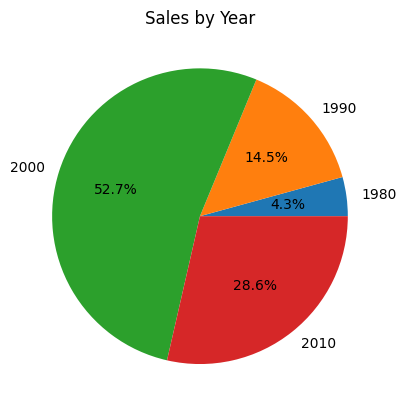

In [ ]:
sales_with_year=df.groupby("Year")["Global_Sales"].sum()
plt.pie(sales_with_year,labels=sales_with_year.index, autopct="%1.1f%%")
plt.title("Sales by Year")
plt.show()

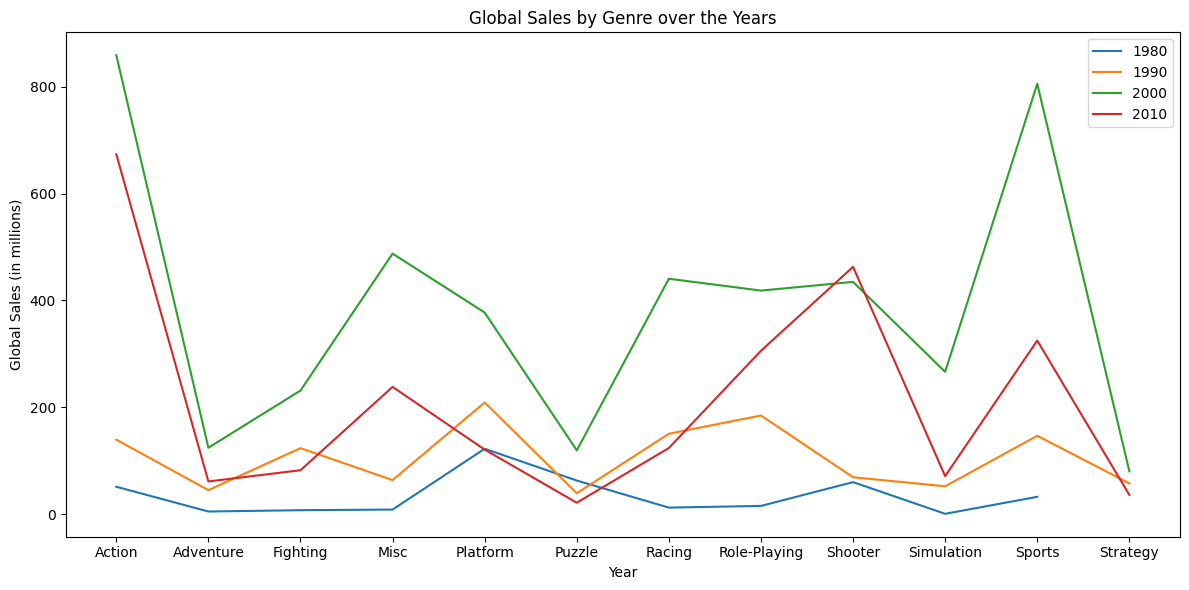

In [ ]:
plt.figure(figsize=(12, 6))
# Plotting a line for each genre
for year in genre_year.columns:
    plt.plot(genre_year.index, genre_year[year], label=year)

plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales by Genre over the Years')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Total number of games published by year
year_count = df["Year"].value_counts()

# Total sales of published games by year
sales_year = df.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)

# Converting to dataframe
year_count_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})
sales_year_df = sales_year.reset_index()
sales_year_df.columns = ["Year", 'Total_Sales']

# Merge dataframes
merged_df2 = pd.merge(year_count_df, sales_year_df , on="Year")
merged_df2

,Year,Count,Total_Sales
0,2000,9208,4644.02
1,2010,5144,2520.56
2,1990,1769,1278.91
3,1980,205,376.58


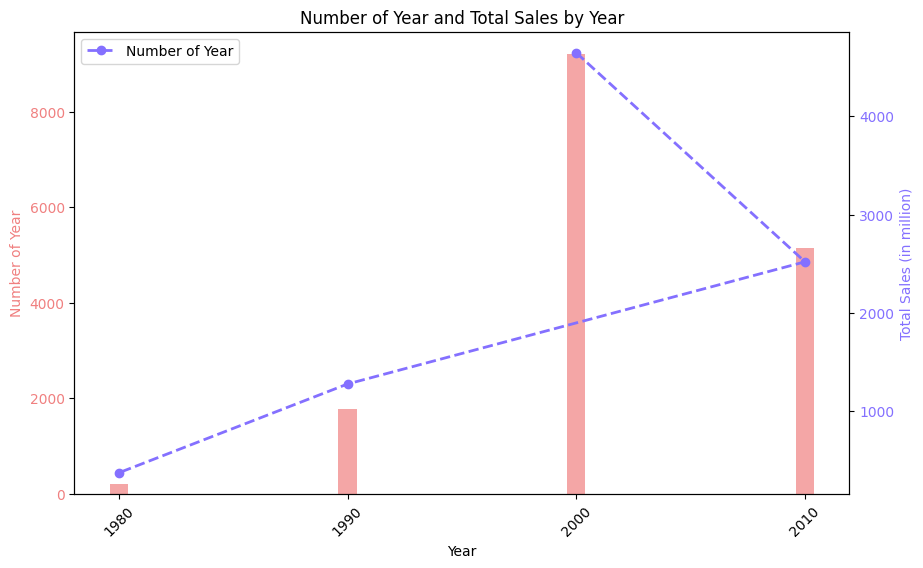

In [ ]:
# Convert Year column to index
if "Year" in merged_df2.columns:
    merged_df2.set_index("Year", inplace=True)

# Let's draw a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))
color = "#F08080"
ax1.set_title("Number of Year and Total Sales by Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Year", color=color)
ax1.bar(merged_df2.index, merged_df2["Count"], color=color, alpha=0.7)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_xticks(merged_df2.index)
ax1.set_xticklabels(merged_df2.index, rotation=45)

# Let's draw the line graph
ax2 = ax1.twinx()
color = "#8470FF"
ax2.set_ylabel("Total Sales (in million)", color=color)
ax2.plot(merged_df2.index, merged_df2["Total_Sales"], color=color, marker="o", linestyle="--", linewidth=2)
ax2.tick_params(axis="y", labelcolor=color)

plt.legend(["Number of Year", "Total Sales (in million)"], loc="upper left")

plt.show()

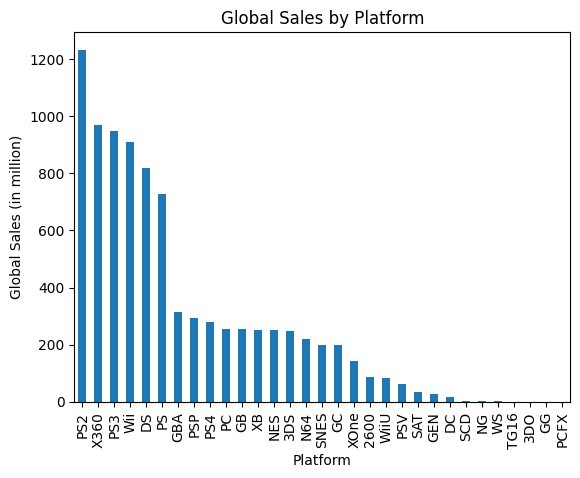

In [ ]:
# Platform Based Global Sales Evaluation
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Global Sales (in million)')
plt.title("Global Sales by Platform")
plt.show()

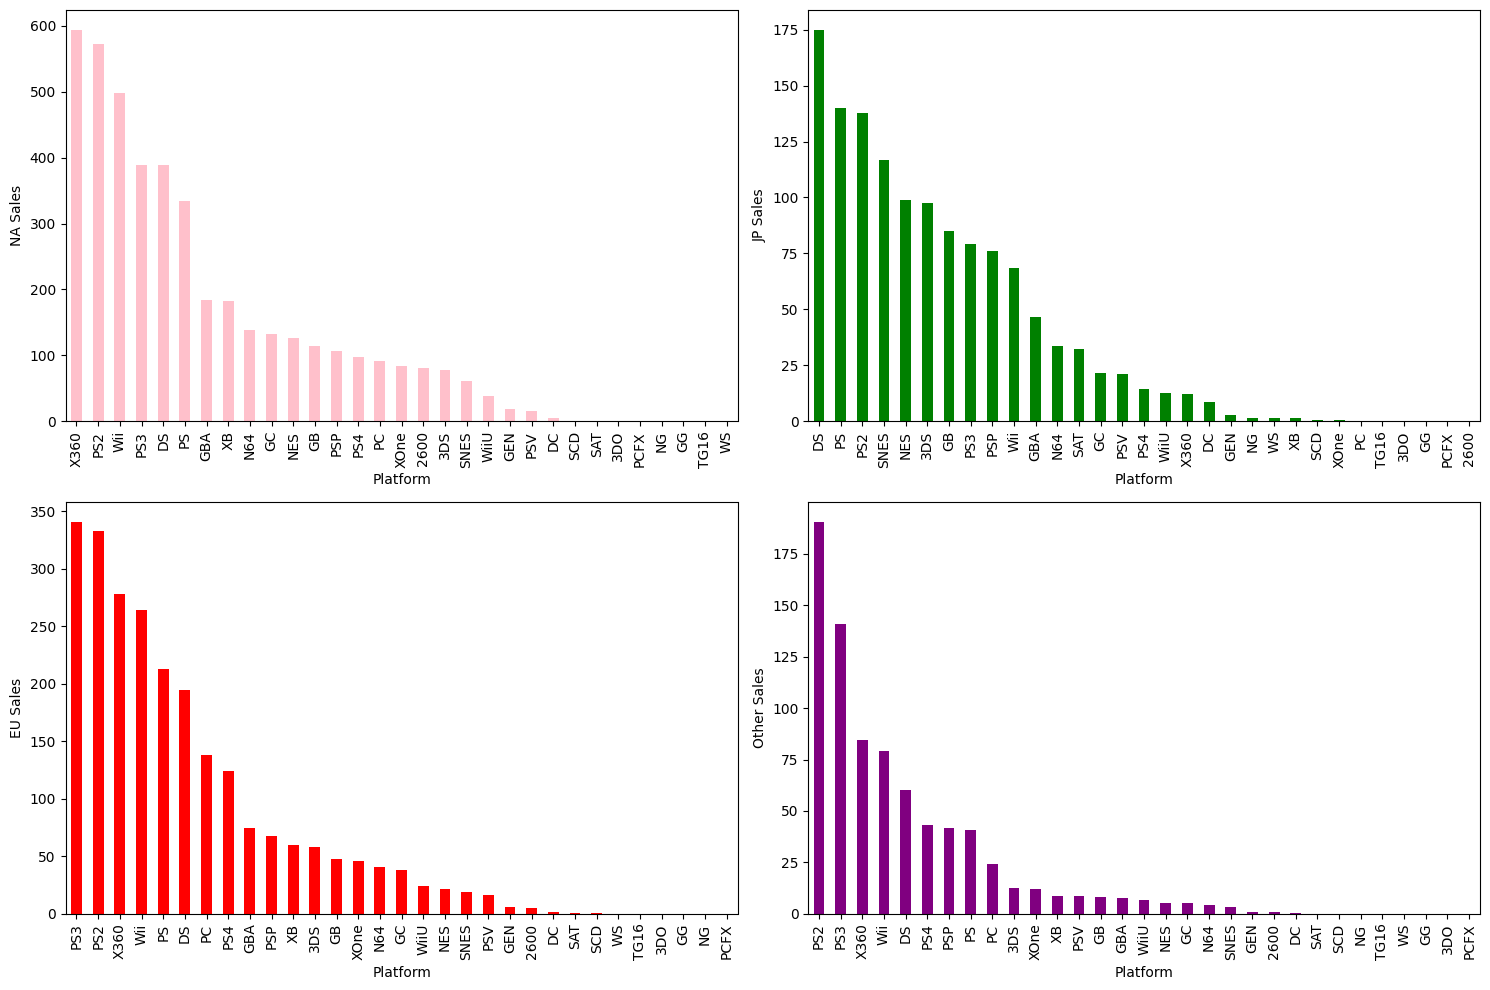

In [ ]:
# Sales Evaluation by Platform Based Regions
fig, ax = plt.subplots(2,2, figsize=(15,10))
df.groupby("Platform")["NA_Sales"].sum().sort_values(ascending=False).plot(kind='bar', ax = ax[0][0], color = 'pink')
df.groupby("Platform")["JP_Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax = ax[0][1], color = 'green')
df.groupby("Platform")["EU_Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax = ax[1][0], color = 'red')
df.groupby("Platform")["Other_Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax = ax[1][1], color = 'purple')

ax[0][0].set_ylabel('NA Sales')
ax[0][1].set_ylabel('JP Sales')
ax[1][0].set_ylabel('EU Sales')
ax[1][1].set_ylabel('Other Sales')

fig.tight_layout()
plt.show()

In [ ]:
# Total number of games published from platforms
platform_count = df["Platform"].value_counts()
# Total sales of games published on platforms
sales_platform_sum = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

# Converting to dataframe
platform_count_df = pd.DataFrame({'Platform': platform_count.index, 'Count': platform_count.values})
sales_platform_sum_df = sales_platform_sum.reset_index()
sales_platform_sum_df.columns = ['Platform', 'Total_Sales']

# Merge dataframes
merged_df = pd.merge(platform_count_df, sales_platform_sum_df, on='Platform')
merged_df

,Platform,Count,Total_Sales
0,DS,2132,818.67
1,PS2,2127,1233.46
2,PS3,1304,949.35
3,Wii,1290,909.81
4,X360,1235,969.61
5,PSP,1197,291.71
6,PS,1189,727.39
7,PC,943,255.05
8,GBA,811,313.56
9,XB,803,252.09


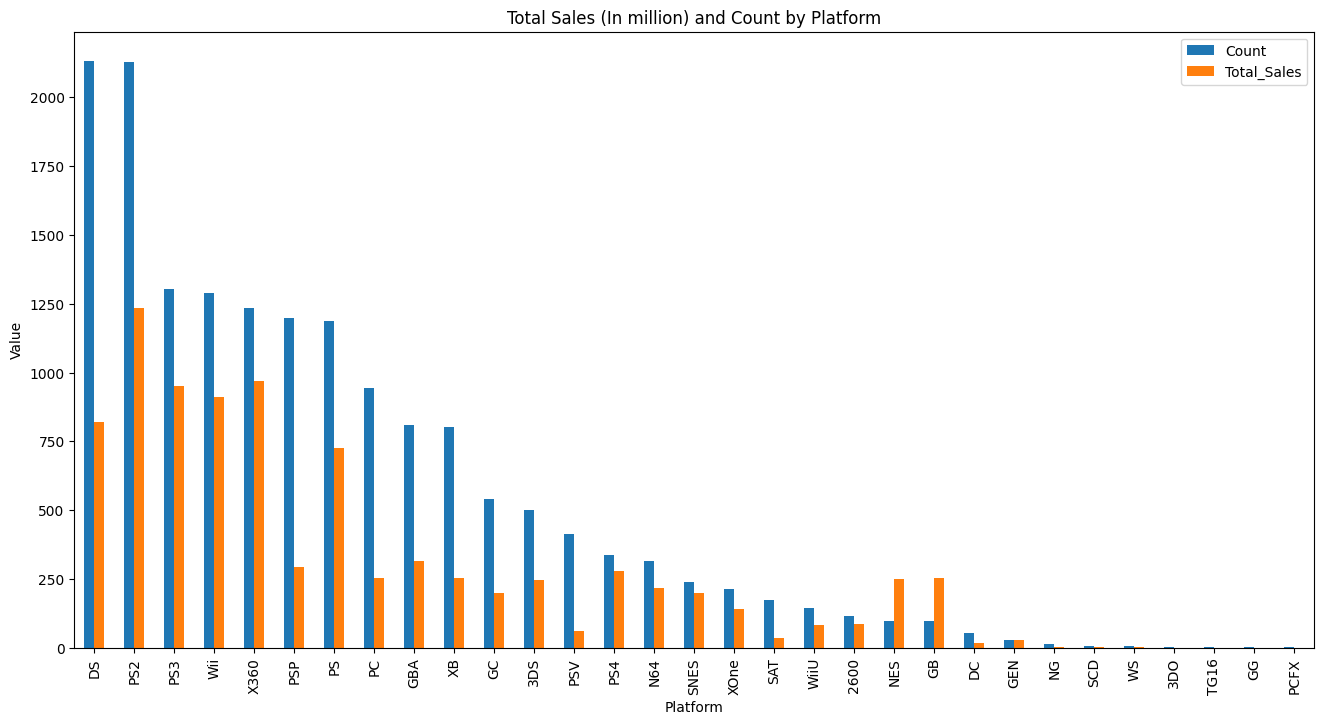

In [ ]:
merged_df.set_index("Platform", inplace=True)
merged_df.plot(kind='bar',figsize=(16, 8))
plt.title('Total Sales (In million) and Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Value')
plt.show()


In [ ]:
df[["Publisher"]].value_counts()


Publisher                   
Electronic Arts                 1375
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
                                ... 
Ertain                             1
Epic Games                         1
Seventh Chord                      1
Enjoy Gaming ltd.                  1
MLB.com                            1
Length: 576, dtype: int64

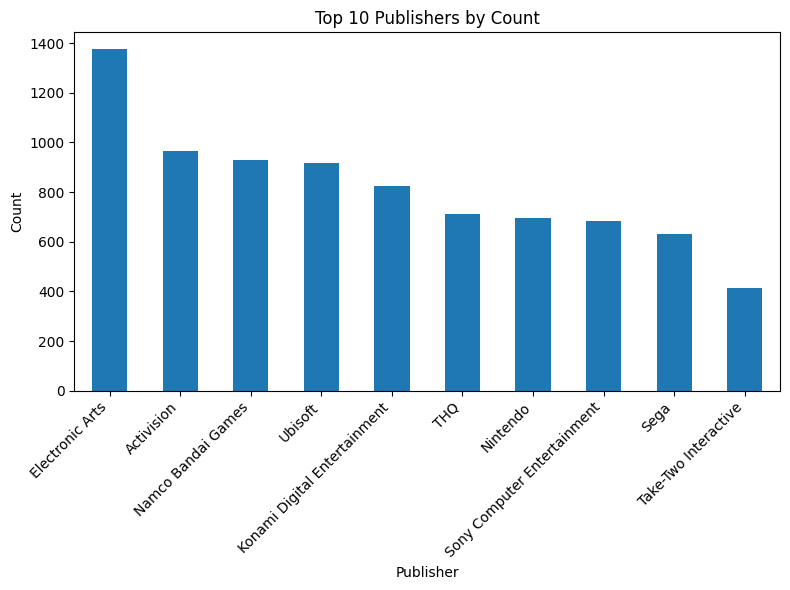

In [ ]:
#Puplisher da ilk 10 oyun sayısı
publisher_count=df['Publisher'].value_counts().head(10)
plt.figure(figsize=(8, 6))
publisher_count.plot(kind='bar')
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.title("Top 10 Publishers by Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

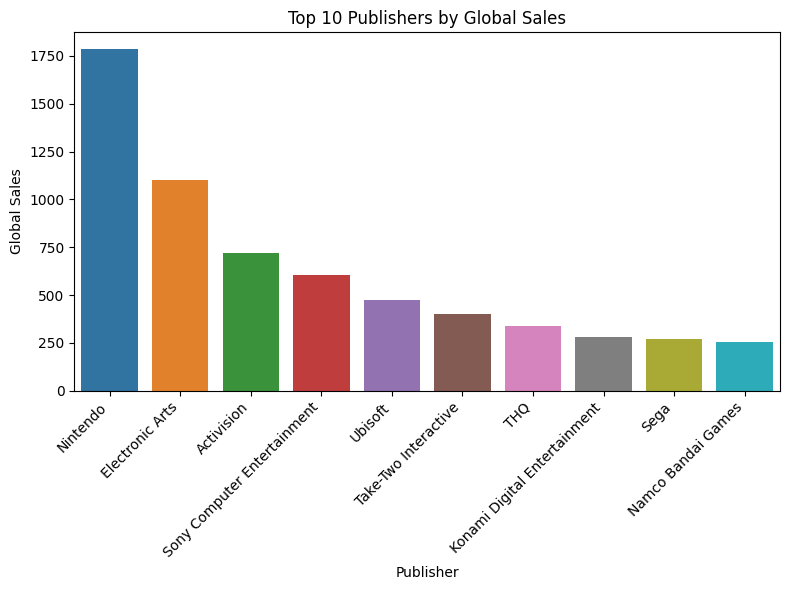

In [ ]:
# Top 10 total sales in Publisher
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xlabel("Publisher")
plt.ylabel("Global Sales")
plt.title("Top 10 Publishers by Global Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

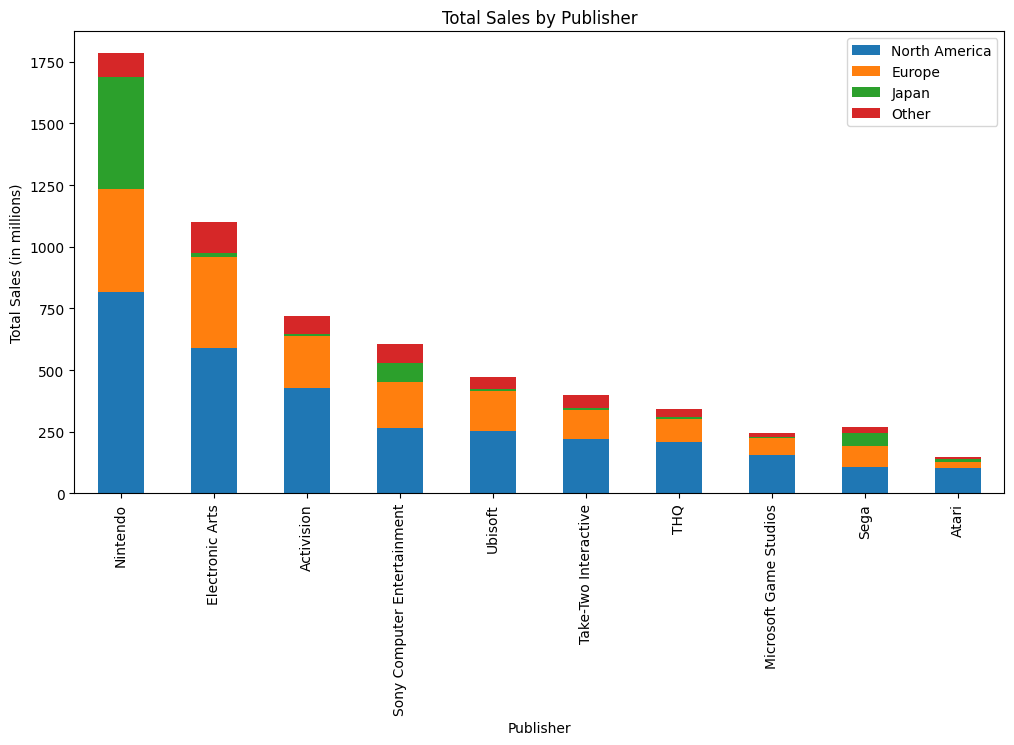

In [ ]:
# Graphs of Publisher's total sales by region
sales_by_publisher = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values(ascending=False,by=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]).head(10)
sales_by_publisher.plot(kind='bar',stacked=True, figsize=(12, 6))
plt.title("Total Sales by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=90)
plt.legend(["North America", "Europe", "Japan", "Other"])
plt.show()

<Figure size 6000x3000 with 0 Axes>

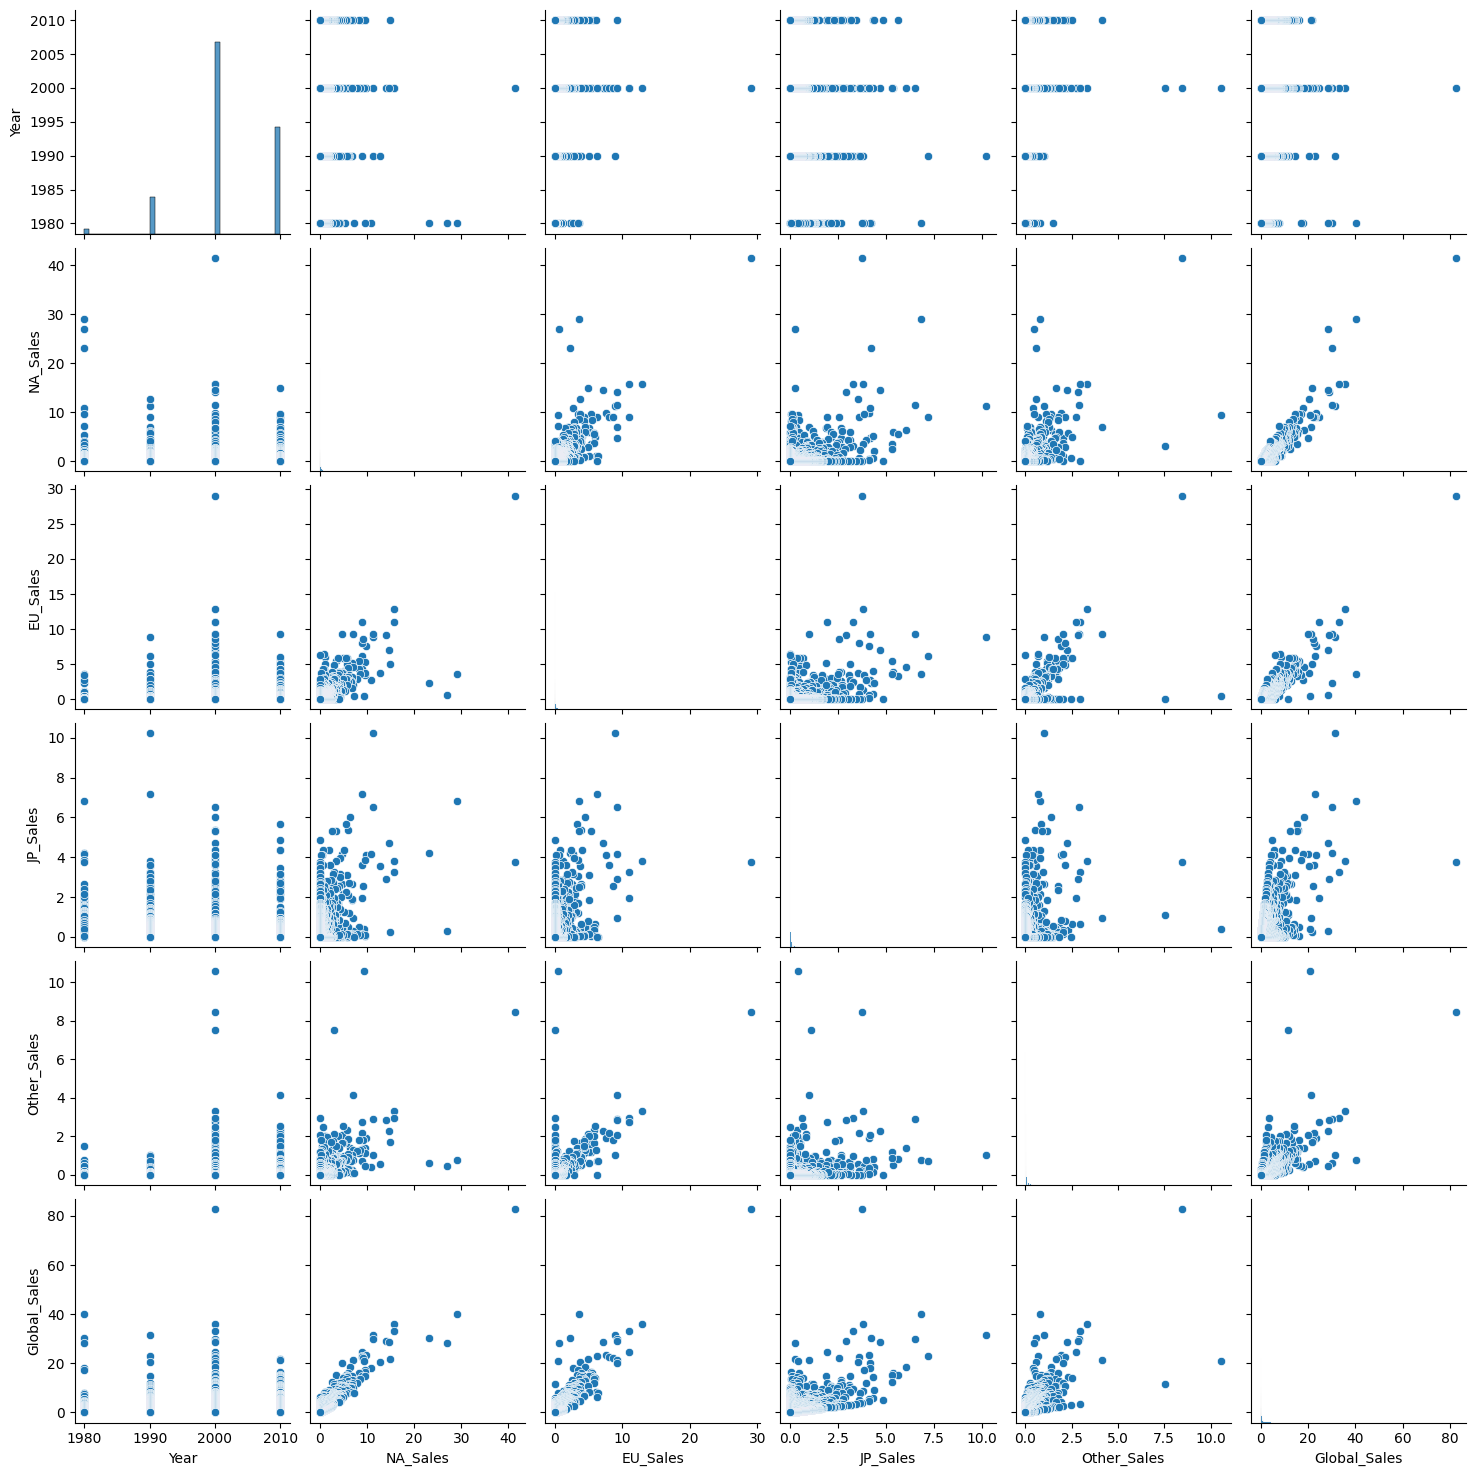

In [ ]:
plt.figure(figsize=(60,30))
sns.pairplot(data=df,kind='scatter')
plt.show()

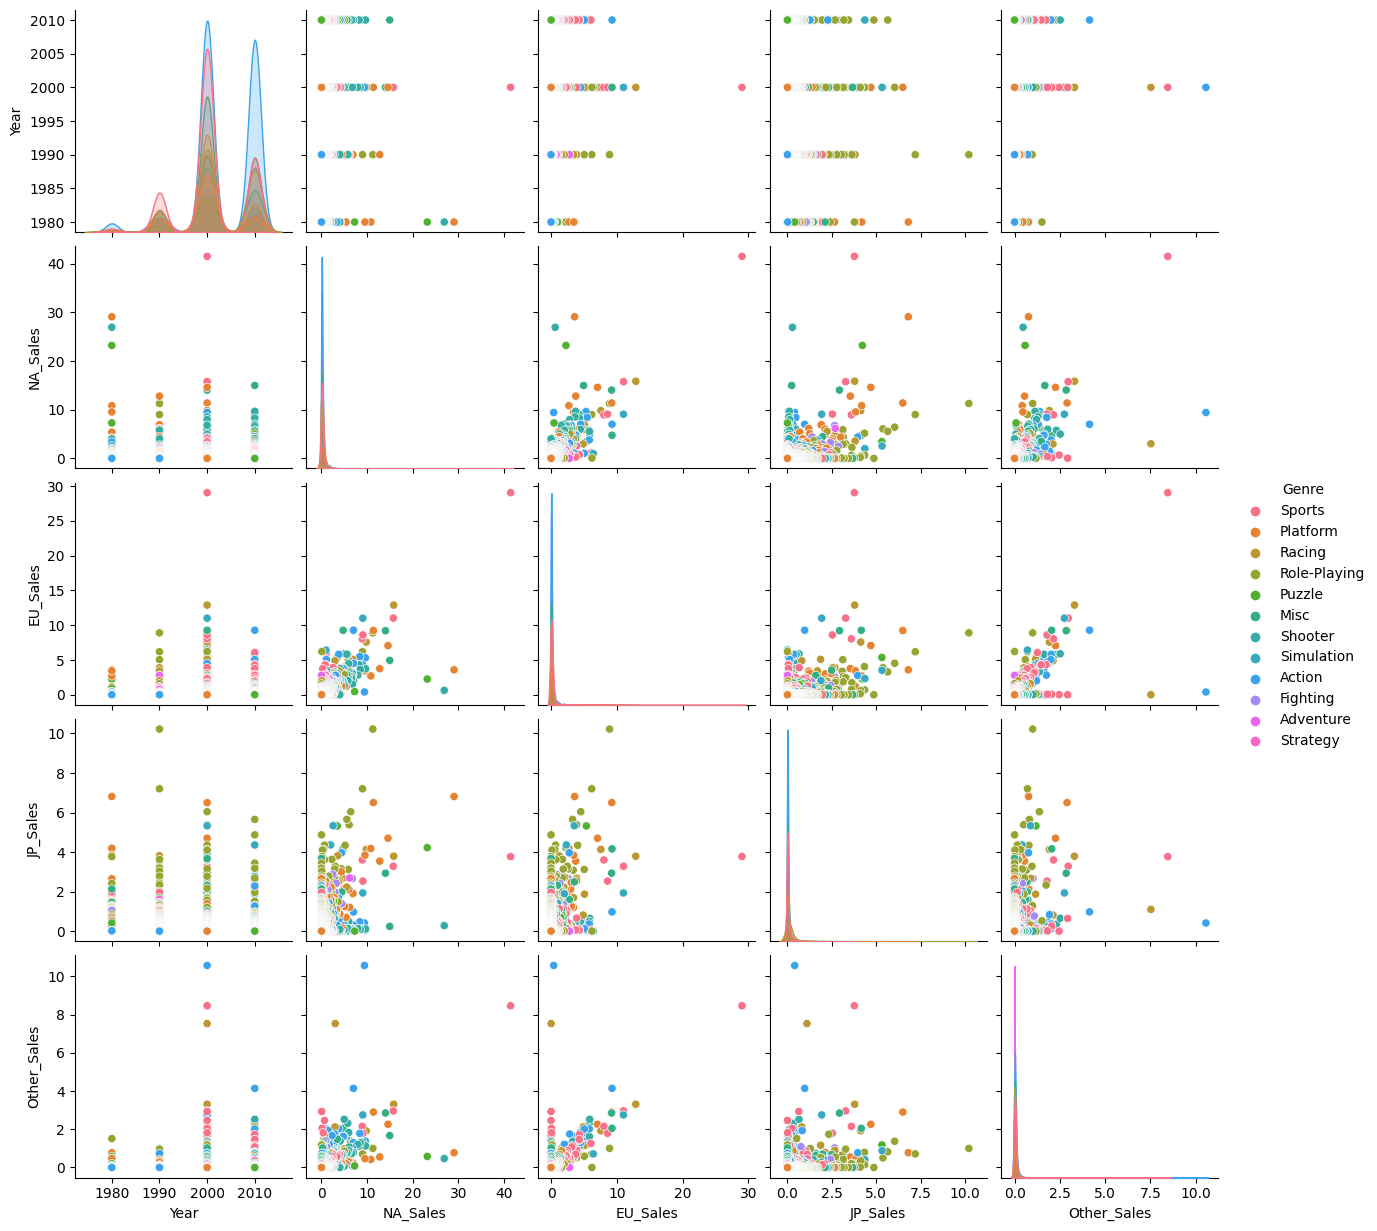

In [ ]:
# Chart of types by year and sales regions
df_pair= df.loc[:,["Year", "Genre", "NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
sns.pairplot(df_pair, hue='Genre')
plt.show()